# Linear Regression with Gradient Descent
This is an implementation of a linear regression with the gradient descent optimization algorithm. It uses only numpy.
First we create an artificial dataset and then we try to fit a line $w_0+w_1*x$. We improve the line every iteration by using the derivatives:
$$
\delta_{w_0} = (\text{prediction} - \text{expected_values}) \\
\delta_{w_1} = (\text{prediction} - \text{expected_values}) * X\text{(input)}
$$

Then we use gradient descent to update the weights:

$$
w_0^* = w_0 - p*\delta_{w_0} \\
w_1^* = w_1 - p*\delta_{w_1}
$$

With $p$ being the learning rate.


In [1]:
import matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation

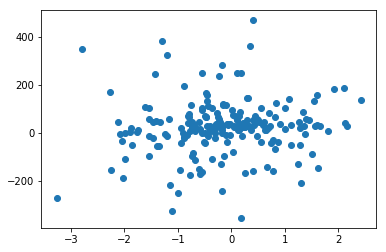

In [2]:
# Let's create a fake dataset
ROWS = 200
LR = 0.002

dataset = np.random.randn(ROWS, 2)
#dataset[ROWS//2:,] = dataset[ROWS//2:,]-0.7
dataset[:,1] = dataset[:,1] * range(ROWS) + 30

fig, ax = plt.subplots()
plt.scatter(dataset[:,0], dataset[:,1])
plt.show()
plt.close()

In [3]:
# Let's set the parameter vector
w = np.random.rand(2, 1) #w0 + w1*x1 + w2*x2 +

data_X = dataset[:,0]
ones = np.ones(ROWS)
data_X = np.append([ones], [data_X], axis = 0)
data_Y = dataset[:,1]


# Let's calculate the prediction

# These arrays are required for visualizations
weights = [w]
errors = []

for i in range(10): # This is the "real" gradient descent part
    prediction = data_X*w 
    error = (prediction-data_Y)
    errors.append(math.sqrt(sum(error.flatten())**2))

    # Let's calculate the derivatives
    w0 = sum(error.flatten())
    w1 = sum((error*data_X).flatten())

    # Let's do gradient descent
    w = w - LR * np.array(w0,w1)
    weights.append(w)

In [4]:
# Do the animation
plt.scatter(dataset[:,0], dataset[:,1])
ax.scatter(dataset[:,0], dataset[:,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(data_X, weights[i]*data_X)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=10)

from IPython.display import HTML
HTML(ani.to_jshtml())

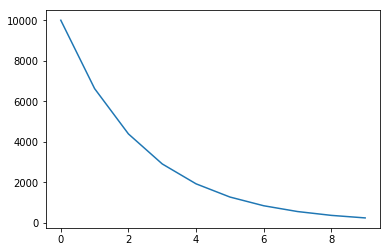

In [5]:
plt.close()

# This is a graph showing the error of the line.
fig, ax = plt.subplots()
ax.plot(range(len(errors)), errors)
plt.show()